# Import modules

In [114]:
#importing libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load Data

In [86]:
data = pd.read_csv("Traffic-Prediction-using-Machine-Learning.csv")
data.head()

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2


**About data**   
Each row in the dataset represents a traffic observation for a specific zone on a specific day. The CSV file contains:
- Day
- Date
- CodedDay
- Zone
- Weather
- Temperature
- Traffic

# Data Exploration
- Pharsing dates
- Ploting timeseris
- Feature engineering for EDA

There have incorrect mapping in the dataset.  
That the "Day" and "CodeDay" where mapped incorrectly from the "Date" column.  
Thus, Deleting the column "Day" and "CodeDay" and bring fratureout from "Date" field.

In [87]:
data["Date"] = pd.to_datetime(data["Date"], format="%d-%m-%y")
data=data.drop('Day',axis=1)
data=data.drop('CodedDay',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1439 non-null   datetime64[ns]
 1   Zone         1439 non-null   int64         
 2   Weather      1439 non-null   int64         
 3   Temperature  1439 non-null   int64         
 4   Traffic      1439 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 56.3 KB


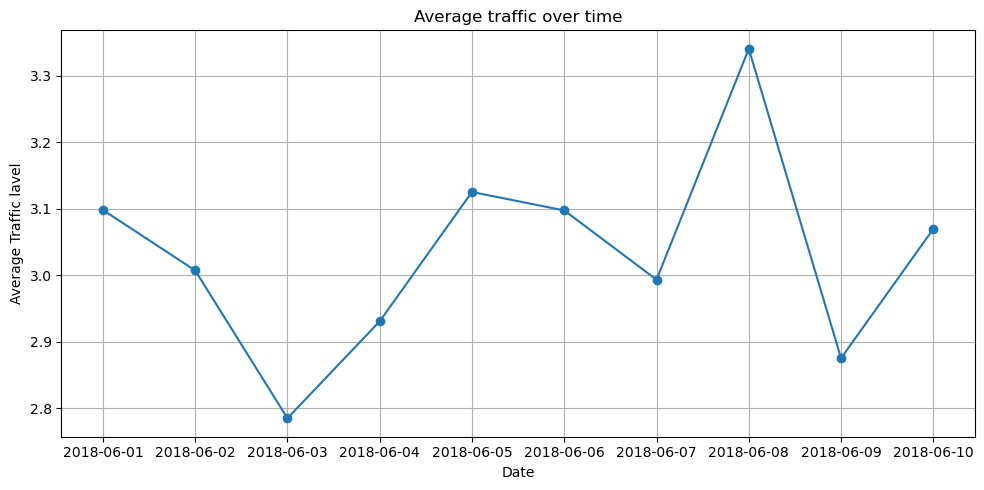

In [88]:
# copy data for EDA
df = data.copy()

#plot timesearies for datetime

#aggregate traffic per date (average across all zones per day)
daily_traffic = df.groupby("Date")['Traffic'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(daily_traffic['Date'],daily_traffic['Traffic'],marker='o',linestyle='-')
plt.title("Average traffic over time")
plt.xlabel('Date')
plt.ylabel('Average Traffic lavel')
plt.grid(True)
plt.tight_layout()
plt.show()


# Feature Engineering
At this step, I am creating a few new features out of DateTime.  
Namely:  
- Year
- Month
- Date in the given month
- Days of Week
- Hour

In [89]:
#Exploring more features
df["Year"]=df['Date'].dt.year
df["Month"]=df['Date'].dt.month
df["Date_no"]=df['Date'].dt.day
df['Day']=df.Date.dt.strftime('%A')
df

,Date,Zone,Weather,Temperature,Traffic,Year,Month,Date_no,Day
0,2018-06-01,2,35,17,2,2018,6,1,Friday
1,2018-06-01,3,36,16,3,2018,6,1,Friday
2,2018-06-01,4,27,25,5,2018,6,1,Friday
3,2018-06-01,5,23,23,3,2018,6,1,Friday
4,2018-06-01,6,18,42,2,2018,6,1,Friday
...,...,...,...,...,...,...,...,...,...
1434,2018-06-10,140,47,38,1,2018,6,10,Sunday
1435,2018-06-10,141,15,8,4,2018,6,10,Sunday
1436,2018-06-10,142,26,38,1,2018,6,10,Sunday
1437,2018-06-10,143,16,34,3,2018,6,10,Sunday


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1439 non-null   datetime64[ns]
 1   Zone         1439 non-null   int64         
 2   Weather      1439 non-null   int64         
 3   Temperature  1439 non-null   int64         
 4   Traffic      1439 non-null   int64         
 5   Year         1439 non-null   int32         
 6   Month        1439 non-null   int32         
 7   Date_no      1439 non-null   int32         
 8   Day          1439 non-null   object        
dtypes: datetime64[ns](1), int32(3), int64(4), object(1)
memory usage: 84.4+ KB


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1439 non-null   datetime64[ns]
 1   Zone         1439 non-null   int64         
 2   Weather      1439 non-null   int64         
 3   Temperature  1439 non-null   int64         
 4   Traffic      1439 non-null   int64         
 5   Year         1439 non-null   int32         
 6   Month        1439 non-null   int32         
 7   Date_no      1439 non-null   int32         
 8   Day          1439 non-null   object        
dtypes: datetime64[ns](1), int32(3), int64(4), object(1)
memory usage: 84.4+ KB


# Exploratory Data Analysis
Plot newly created features

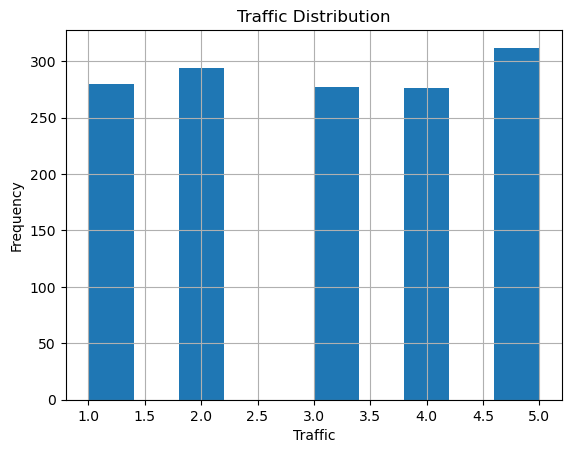

In [92]:
# hustogram for traffic distribution
df['Traffic'].hist()
plt.title('Traffic Distribution')
plt.xlabel('Traffic')
plt.ylabel('Frequency')

plt.show()

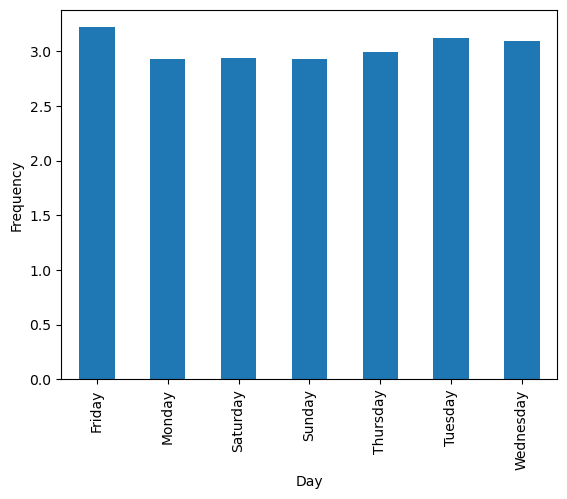

In [93]:
# traffic trands by day
df.groupby('Day')['Traffic'].mean().plot(kind='bar')
plt.ylabel('Frequency')
plt.show()


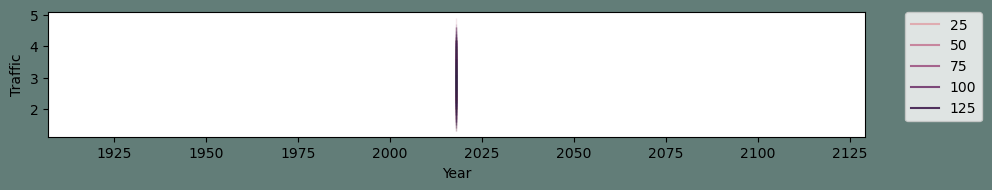

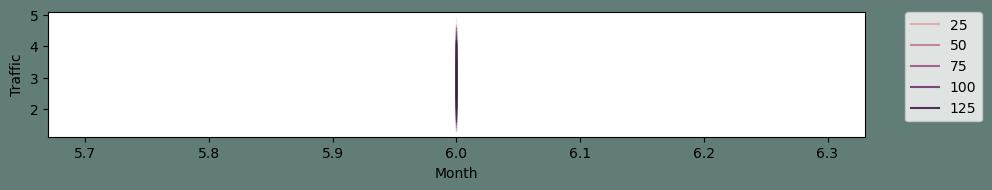

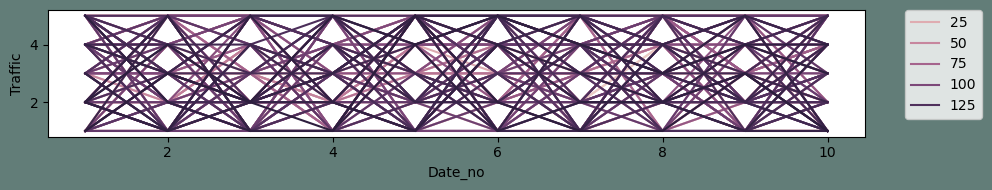

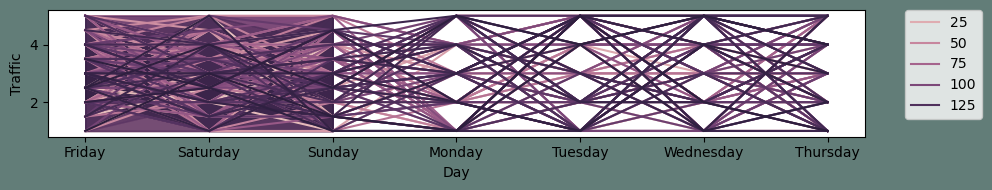

In [94]:

new_features = ["Year", "Month", "Date_no","Day"] 

for i in new_features:
    plt.figure(figsize=(10, 2), facecolor="#627D78")
    ax = sns.lineplot(x=df[i], y="Traffic", data=df, hue="Zone")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()

### Conclusion from the Parallel Coordinate Plots

From the above visualizations, the following observations can be made:
- The data was provided for a single year
- The data was given for a single month also
- Traffic trends by date:
    - Traffic levels are fairly consistent across different dates.
    - No single date shows an unusually high or low traffic volume, suggesting that daily fluctuations are relatively stable.
- Traffic trends by day of the week:
    - Friday, Saturday, and Sunday show higher densities of lines in the upper traffic categories, indicating increased traffic volumes during weekends.
    - Monday has slightly reduced traffic activity compared to weekends.
    - Tuesday to Thursday display moderate and steady traffic patterns without large spikes.
- Overall insight:
    - The day of the week appears to have a stronger influence on traffic volume than the specific date.
    - Weekend traffic peaks should be considered when building predictive models to improve accuracy.

In [95]:
df.columns

Index(['Date', 'Zone', 'Weather', 'Temperature', 'Traffic', 'Year', 'Month',
       'Date_no', 'Day'],
      dtype='object')

In [96]:
# encode day with one hote encoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids dummy variable trap

# Fit and transform 'Day' column
day_encoded = encoder.fit_transform(df[['Day']])

# Create a DataFrame with encoded columns
encoded_df = pd.DataFrame(day_encoded, columns=encoder.get_feature_names_out(['Day']))

# Concatenate with original DataFrame (excluding original 'Day')
df = pd.concat([df.drop('Day', axis=1), encoded_df], axis=1)

# Show result
df.head()

,Date,Zone,Weather,Temperature,Traffic,Year,Month,Date_no,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2018-06-01,2,35,17,2,2018,6,1,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-06-01,3,36,16,3,2018,6,1,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-06-01,4,27,25,5,2018,6,1,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-06-01,5,23,23,3,2018,6,1,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-06-01,6,18,42,2,2018,6,1,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
df=df.drop('Year',axis=1) # same year
df=df.drop('Month',axis=1) # same month
df=df.drop('Date',axis=1) # encoded to year, date_no, month,day

C:\Users\Shadia\AppData\Local\Temp\ipykernel_9684\3386077473.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Traffic', data=avg_traffic_by_day, palette='viridis')


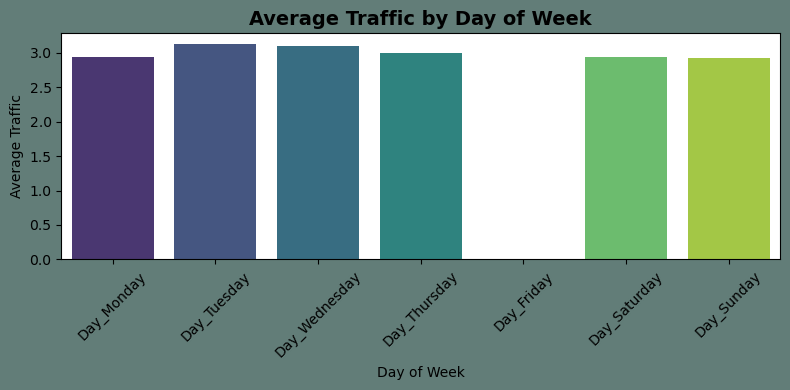

In [98]:

day_columns = ['Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Saturday', 'Day_Sunday']

# Melt one-hot encoded columns into a single 'Day' column
df_days = df.melt(
    id_vars=['Traffic'],
    value_vars=day_columns,
    var_name='Day',
    value_name='is_day'
)


# Filter only rows where the day flag is 1
df_days = df_days[df_days['is_day'] == 1]

# Group by day and compute average traffic
avg_traffic_by_day = df_days.groupby('Day')['Traffic'].mean().reset_index()

# Sort days in a logical order
day_order = ['Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday', 'Day_Friday', 'Day_Saturday', 'Day_Sunday']
avg_traffic_by_day['Day'] = pd.Categorical(avg_traffic_by_day['Day'], categories=day_order, ordered=True)
avg_traffic_by_day = avg_traffic_by_day.sort_values('Day')

# Plot
plt.figure(figsize=(8, 4), facecolor="#627D78")
sns.barplot(x='Day', y='Traffic', data=avg_traffic_by_day, palette='viridis')
plt.title('Average Traffic by Day of Week', fontsize=14, fontweight='bold')
plt.ylabel('Average Traffic')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

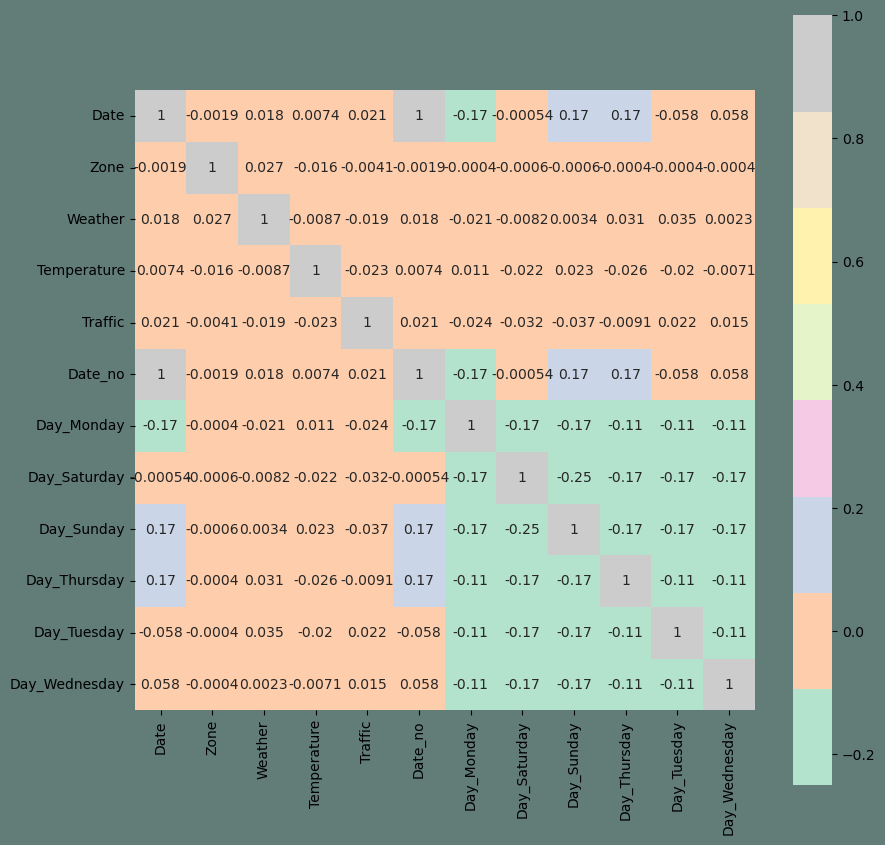

In [99]:
# heatmap for corelation 
corrmat = df.corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )

The highest correlation is certainly with the preexisting feature.

I will conclude my EDA with a pair plot. It's an interesting overall representation of any data.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1439 non-null   datetime64[ns]
 1   Zone           1439 non-null   int64         
 2   Weather        1439 non-null   int64         
 3   Temperature    1439 non-null   int64         
 4   Traffic        1439 non-null   int64         
 5   Date_no        1439 non-null   int32         
 6   Day_Monday     1439 non-null   float64       
 7   Day_Saturday   1439 non-null   float64       
 8   Day_Sunday     1439 non-null   float64       
 9   Day_Thursday   1439 non-null   float64       
 10  Day_Tuesday    1439 non-null   float64       
 11  Day_Wednesday  1439 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(4)
memory usage: 129.4 KB


# Data Transformation And Preprocessing

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1439 non-null   datetime64[ns]
 1   Zone           1439 non-null   int64         
 2   Weather        1439 non-null   int64         
 3   Temperature    1439 non-null   int64         
 4   Traffic        1439 non-null   int64         
 5   Date_no        1439 non-null   int32         
 6   Day_Monday     1439 non-null   float64       
 7   Day_Saturday   1439 non-null   float64       
 8   Day_Sunday     1439 non-null   float64       
 9   Day_Thursday   1439 non-null   float64       
 10  Day_Tuesday    1439 non-null   float64       
 11  Day_Wednesday  1439 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(4)
memory usage: 129.4 KB


In [106]:
df.head()

,Zone,Weather,Temperature,Traffic,Date_no,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2,35,17,2,1,0.0,0.0,0.0,0.0,0.0,0.0
1,3,36,16,3,1,0.0,0.0,0.0,0.0,0.0,0.0
2,4,27,25,5,1,0.0,0.0,0.0,0.0,0.0,0.0
3,5,23,23,3,1,0.0,0.0,0.0,0.0,0.0,0.0
4,6,18,42,2,1,0.0,0.0,0.0,0.0,0.0,0.0


# Perform PCA

In [107]:
X = df.drop(columns=['Traffic'])
y = df['Traffic']

In [110]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print('Ratio of the PCA: ',pca.explained_variance_ratio_)
print("Sum of the variance: ",pca.explained_variance_ratio_.sum())

df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])


Ratio of the PCA:  [0.13942235 0.12279036 0.11812932 0.11226176 0.11111981 0.10220058
 0.09884763 0.09625976 0.07657748]
Sum of the variance:  0.9776090714231387


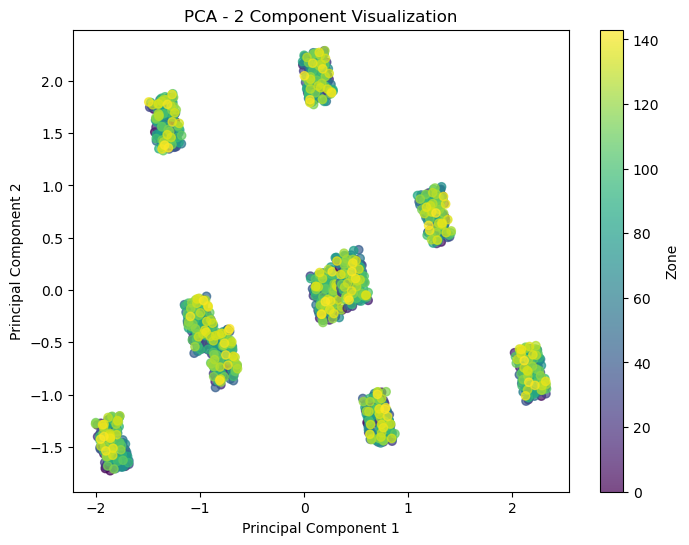

In [111]:
#visualization of PCA
plt.figure(figsize=(8,6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['Zone'].astype('category').cat.codes,cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Component Visualization')
plt.colorbar(scatter, label='Zone')

plt.show()

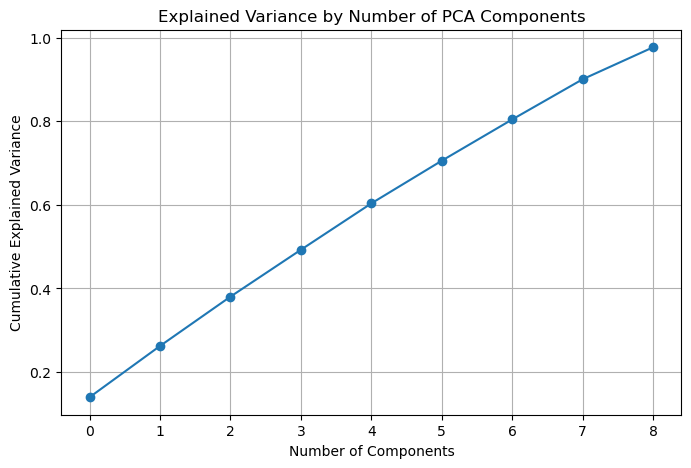

In [112]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# Train, predict, evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="RMSE"))

               Model       MAE      RMSE
0  Linear Regression  1.243697  1.447373
3  Gradient Boosting  1.272265  1.477624
2      Random Forest  1.270162  1.495461
1      Decision Tree  1.620370  2.041241


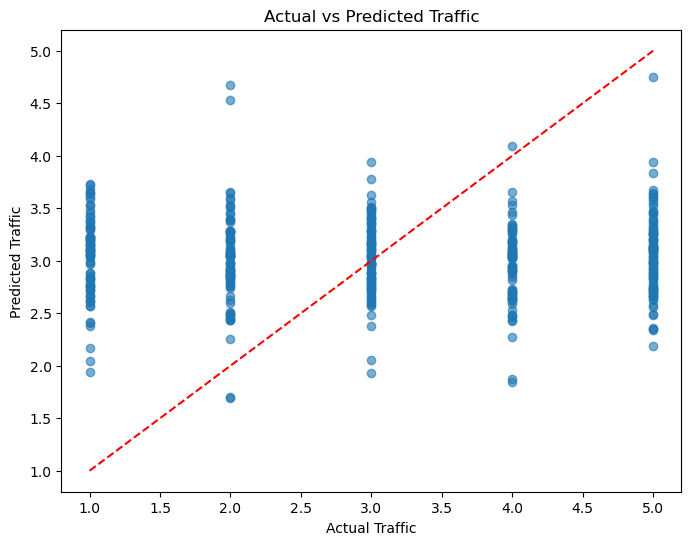

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Traffic')
plt.ylabel('Predicted Traffic')
plt.title('Actual vs Predicted Traffic')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()